In [1]:
from google.colab import drive
drive.mount('/content/drive')
root_dir = '/content/drive/My Drive'

Mounted at /content/drive


In [2]:
!unzip '/content/drive/MyDrive/pregatire-iaio-ziua-4.zip'

Archive:  /content/drive/MyDrive/pregatire-iaio-ziua-4.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv('/content/train.csv')
pd.set_option('display.max_columns', None)

In [6]:
df

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,19214,749,757,143210,143219,17,4,4,2193,122,140,1360,0,0,50,0.8950,0.1500,0.8571,0.0044,1.0000,0.8000,0.0,1.2305,0.7782,0.6021,-0.1429,0.0044,0.2901,0,0,0,1,0,0,0
19215,19215,723,735,2488529,2488541,231,17,26,27135,104,133,1652,1,0,70,0.9243,0.3254,0.2778,0.0065,0.7333,0.9216,1.0,2.3636,1.0414,1.4150,0.7222,-0.0989,0.5378,0,0,0,0,0,0,1
19216,19216,6,31,1578055,1578129,780,114,98,71112,41,94,1358,0,1,200,0.0148,0.4331,0.2281,0.0199,0.1862,0.9554,1.0,2.8921,1.4314,1.8692,0.7719,-0.4283,0.9997,1,0,0,0,0,0,0
19217,19217,9,18,1713172,1713184,126,13,26,14808,88,132,1692,1,0,60,0.0192,0.2361,0.0390,0.0068,0.7692,1.0000,1.0,2.1004,1.0414,1.4150,0.9610,-0.1162,0.3509,0,0,0,0,0,0,1


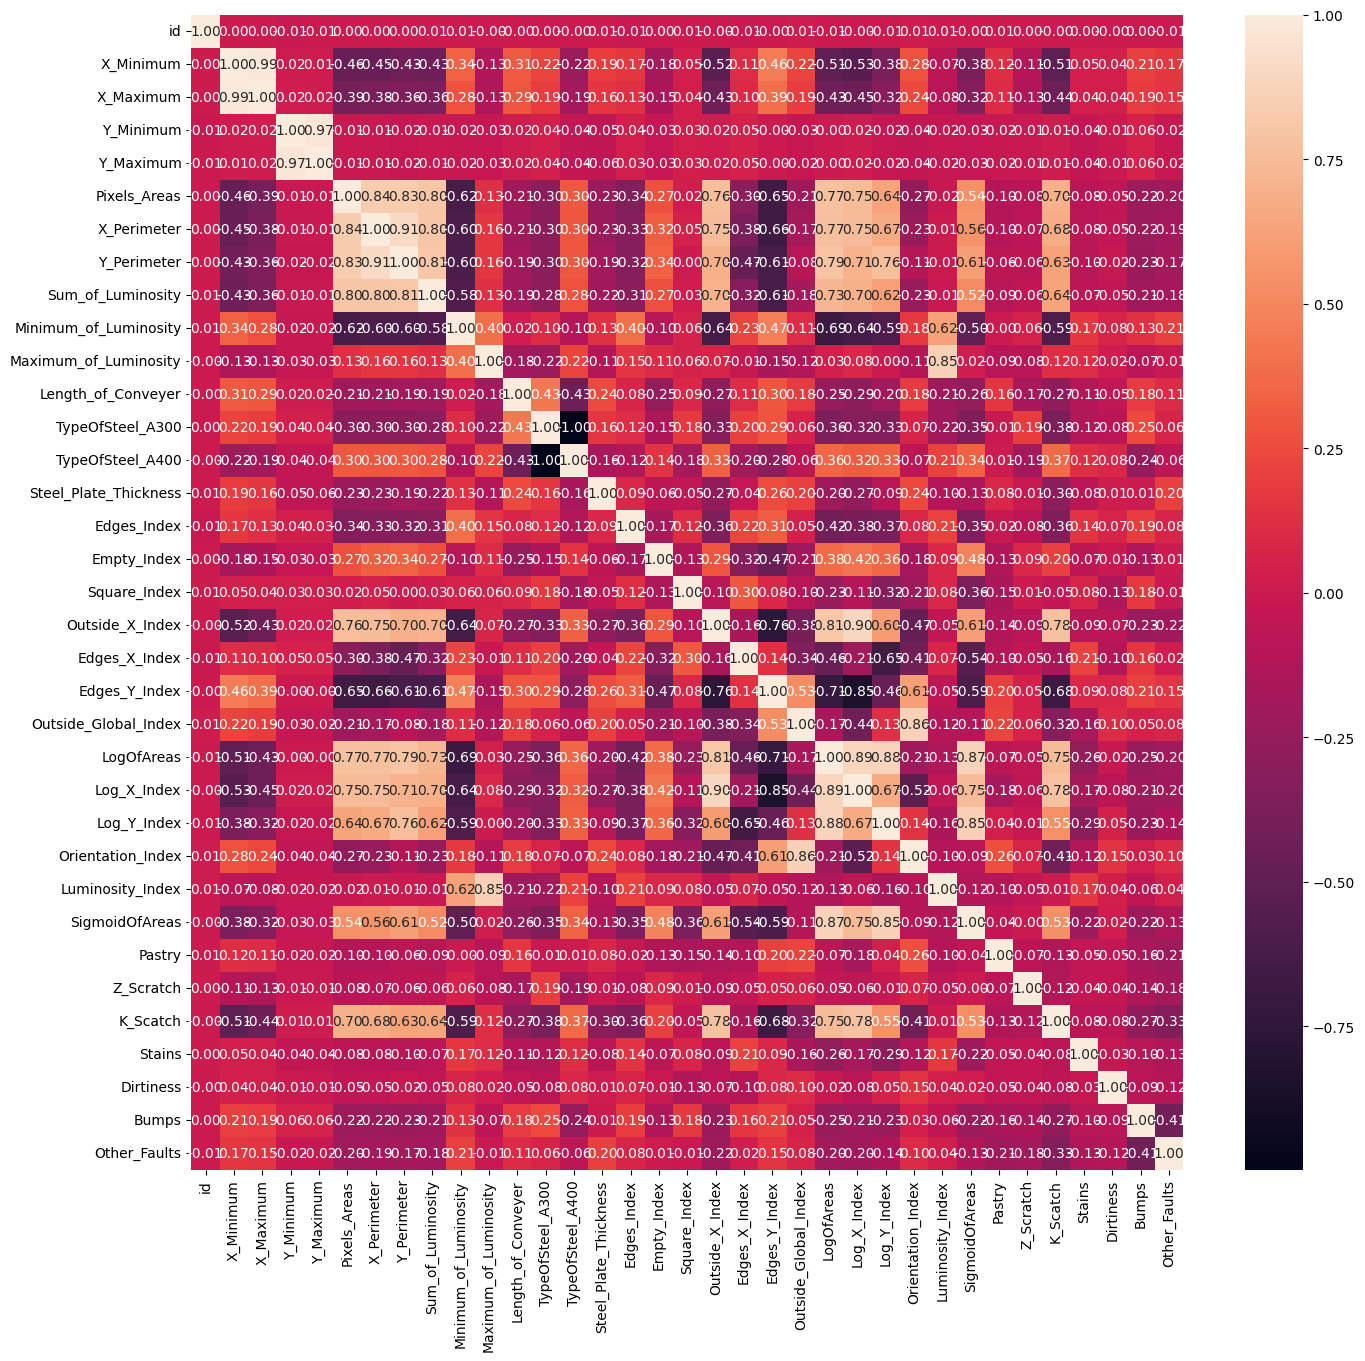

In [15]:
plt.figure(figsize = (16, 15))
sns.heatmap(df.corr(), annot = True, fmt = ".2f")
plt.show()

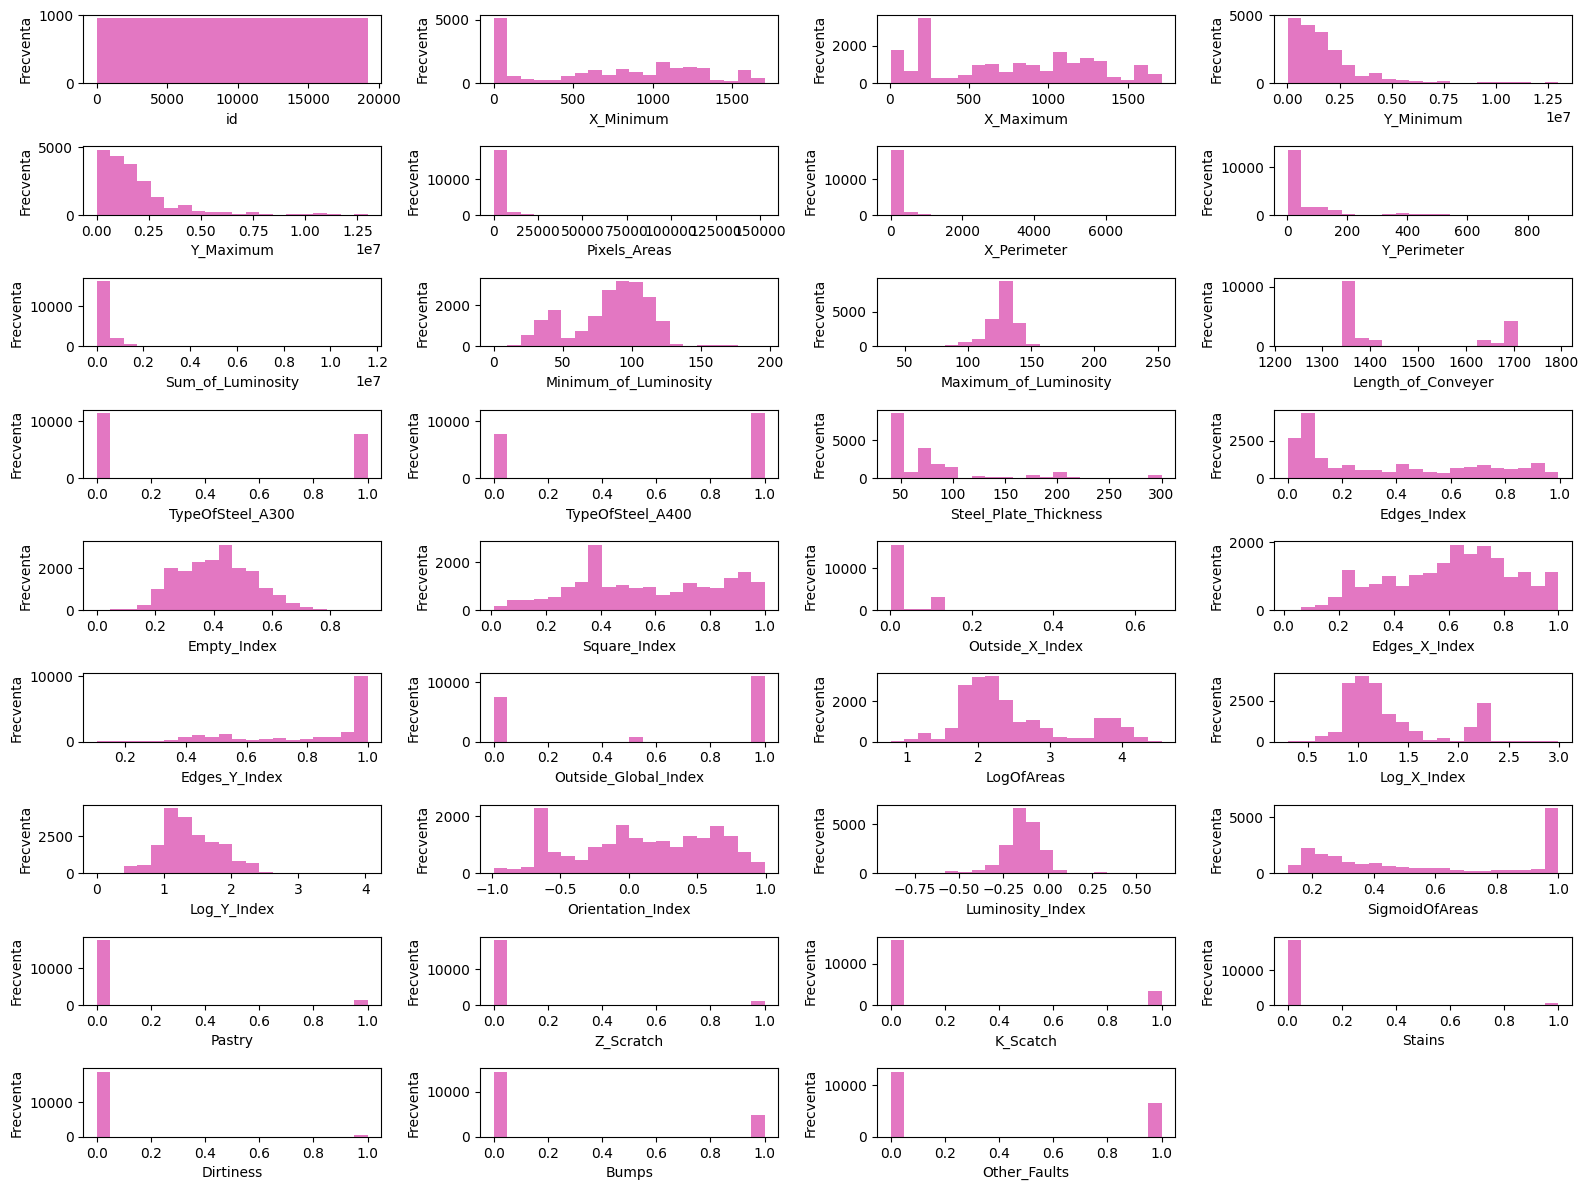

In [14]:
num_cols = 4
num_rows = (len(df.columns) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    axes[i].hist(df[column], bins=20,color='tab:pink')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frecventa')

for i in range(len(df.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [17]:
# Practical component analysis
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
df['pca_perimeter'] = pca.fit_transform(df[['Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity']])

In [18]:
df

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,pca_perimeter
0,0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0,-1.895796e+05
1,1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1,-1.473738e+05
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0,1.119584e+06
3,3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0,-1.886503e+05
4,4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1,-1.436203e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,19214,749,757,143210,143219,17,4,4,2193,122,140,1360,0,0,50,0.8950,0.1500,0.8571,0.0044,1.0000,0.8000,0.0,1.2305,0.7782,0.6021,-0.1429,0.0044,0.2901,0,0,0,1,0,0,0,-1.896606e+05
19215,19215,723,735,2488529,2488541,231,17,26,27135,104,133,1652,1,0,70,0.9243,0.3254,0.2778,0.0065,0.7333,0.9216,1.0,2.3636,1.0414,1.4150,0.7222,-0.0989,0.5378,0,0,0,0,0,0,1,-1.647177e+05
19216,19216,6,31,1578055,1578129,780,114,98,71112,41,94,1358,0,1,200,0.0148,0.4331,0.2281,0.0199,0.1862,0.9554,1.0,2.8921,1.4314,1.8692,0.7719,-0.4283,0.9997,1,0,0,0,0,0,0,-1.207380e+05
19217,19217,9,18,1713172,1713184,126,13,26,14808,88,132,1692,1,0,60,0.0192,0.2361,0.0390,0.0068,0.7692,1.0000,1.0,2.1004,1.0414,1.4150,0.9610,-0.1162,0.3509,0,0,0,0,0,0,1,-1.770452e+05


In [20]:
pca = PCA(n_components = 1)
df['pca_area'] = pca.fit_transform(df[['LogOfAreas', 'Log_X_Index', 'Log_Y_Index']])

In [21]:
df

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,pca_perimeter,pca_area
0,0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0,-1.895796e+05,-1.471603
1,1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1,-1.473738e+05,0.019517
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0,1.119584e+06,1.980679
3,3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0,-1.886503e+05,-0.348504
4,4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1,-1.436203e+05,0.472381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,19214,749,757,143210,143219,17,4,4,2193,122,140,1360,0,0,50,0.8950,0.1500,0.8571,0.0044,1.0000,0.8000,0.0,1.2305,0.7782,0.6021,-0.1429,0.0044,0.2901,0,0,0,1,0,0,0,-1.896606e+05,-1.544128
19215,19215,723,735,2488529,2488541,231,17,26,27135,104,133,1652,1,0,70,0.9243,0.3254,0.2778,0.0065,0.7333,0.9216,1.0,2.3636,1.0414,1.4150,0.7222,-0.0989,0.5378,0,0,0,0,0,0,1,-1.647177e+05,-0.201941
19216,19216,6,31,1578055,1578129,780,114,98,71112,41,94,1358,0,1,200,0.0148,0.4331,0.2281,0.0199,0.1862,0.9554,1.0,2.8921,1.4314,1.8692,0.7719,-0.4283,0.9997,1,0,0,0,0,0,0,-1.207380e+05,0.574132
19217,19217,9,18,1713172,1713184,126,13,26,14808,88,132,1692,1,0,60,0.0192,0.2361,0.0390,0.0068,0.7692,1.0000,1.0,2.1004,1.0414,1.4150,0.9610,-0.1162,0.3509,0,0,0,0,0,0,1,-1.770452e+05,-0.413743


In [23]:
df['x_min_encoded'] = (df['X_Minimum'] + df['X_Maximum']) / 2
df['y_min_encoded'] = (df['Y_Minimum'] + df['Y_Maximum']) / 2

In [24]:
df

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,pca_perimeter,pca_area,x_min_encoded,y_min_encoded
0,0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0,-1.895796e+05,-1.471603,587.0,909974.5
1,1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1,-1.473738e+05,0.019517,812.0,728361.0
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0,1.119584e+06,1.980679,115.5,2212110.0
3,3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0,-1.886503e+05,-0.348504,785.0,3353159.5
4,4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1,-1.436203e+05,0.472381,1550.0,618479.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,19214,749,757,143210,143219,17,4,4,2193,122,140,1360,0,0,50,0.8950,0.1500,0.8571,0.0044,1.0000,0.8000,0.0,1.2305,0.7782,0.6021,-0.1429,0.0044,0.2901,0,0,0,1,0,0,0,-1.896606e+05,-1.544128,753.0,143214.5
19215,19215,723,735,2488529,2488541,231,17,26,27135,104,133,1652,1,0,70,0.9243,0.3254,0.2778,0.0065,0.7333,0.9216,1.0,2.3636,1.0414,1.4150,0.7222,-0.0989,0.5378,0,0,0,0,0,0,1,-1.647177e+05,-0.201941,729.0,2488535.0
19216,19216,6,31,1578055,1578129,780,114,98,71112,41,94,1358,0,1,200,0.0148,0.4331,0.2281,0.0199,0.1862,0.9554,1.0,2.8921,1.4314,1.8692,0.7719,-0.4283,0.9997,1,0,0,0,0,0,0,-1.207380e+05,0.574132,18.5,1578092.0
19217,19217,9,18,1713172,1713184,126,13,26,14808,88,132,1692,1,0,60,0.0192,0.2361,0.0390,0.0068,0.7692,1.0000,1.0,2.1004,1.0414,1.4150,0.9610,-0.1162,0.3509,0,0,0,0,0,0,1,-1.770452e+05,-0.413743,13.5,1713178.0


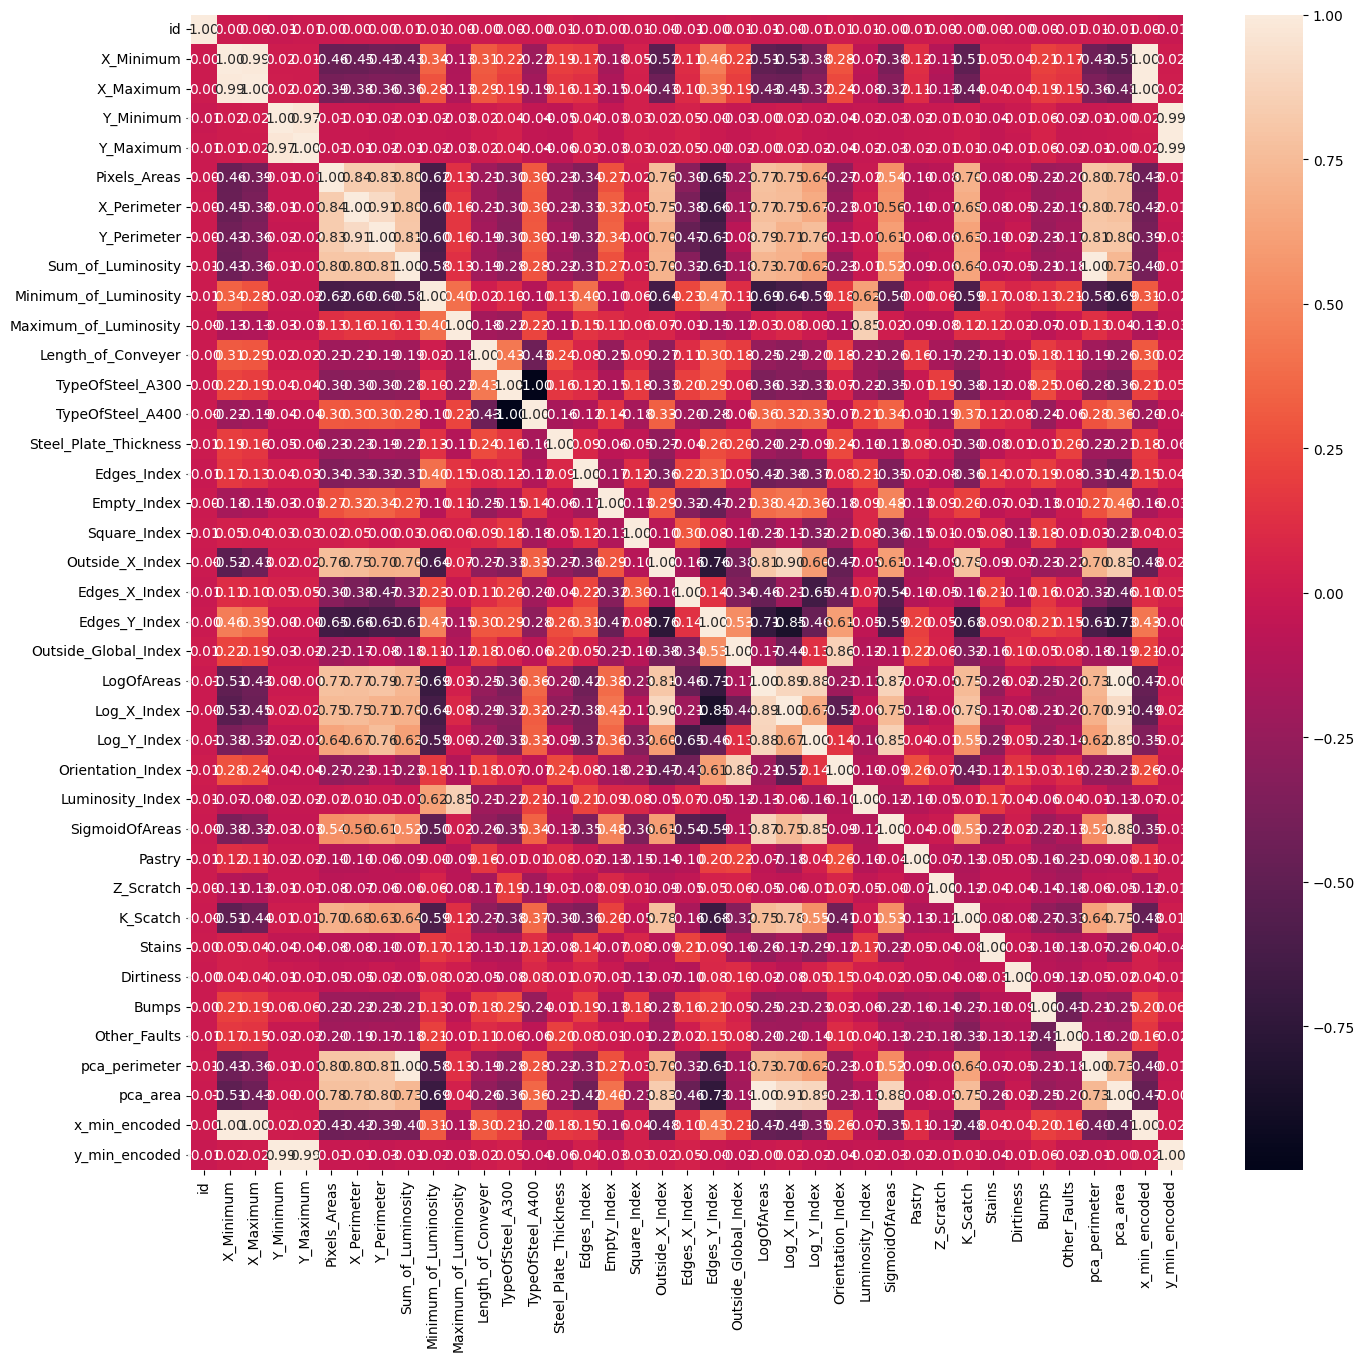

In [25]:
plt.figure(figsize = (16, 15))
sns.heatmap(df.corr(), annot = True, fmt = ".2f")
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
X = df.drop(columns = ['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'])

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Minimum_of_Luminosity  19219 non-null  int64  
 1   Maximum_of_Luminosity  19219 non-null  int64  
 2   Length_of_Conveyer     19219 non-null  int64  
 3   TypeOfSteel_A300       19219 non-null  int64  
 4   TypeOfSteel_A400       19219 non-null  int64  
 5   Steel_Plate_Thickness  19219 non-null  int64  
 6   Edges_Index            19219 non-null  float64
 7   Empty_Index            19219 non-null  float64
 8   Square_Index           19219 non-null  float64
 9   Outside_X_Index        19219 non-null  float64
 10  Edges_X_Index          19219 non-null  float64
 11  Edges_Y_Index          19219 non-null  float64
 12  Outside_Global_Index   19219 non-null  float64
 13  Orientation_Index      19219 non-null  float64
 14  Luminosity_Index       19219 non-null  float64
 15  Si

In [29]:
y = df[[
    'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'
]]

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import train_test_split

from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [73]:
!pip install optuna
import optuna
import lightgbm as lgb
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the objective function
def objective(trial):
    # Hyperparameters to tune
    param = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'verbosity': -1,
        'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 10.0)
    }

    # Initialize base classifier and MultiOutputClassifier
    base_classifier = lgb.LGBMClassifier(**param)
    multi_output_classifier = MultiOutputClassifier(base_classifier, n_jobs=-1)

    # Train the multi-output classifier
    multi_output_classifier.fit(X_train, y_train)

    # Predict probabilities for each output
    y_pred_proba = [multi_output_classifier.estimators_[i].predict_proba(X_test) for i in range(len(y.columns))]

    # Calculate accuracies for each output
    accuracies = [accuracy_score(y_test.iloc[:, i], y_pred_proba[i][:, 1] > 0.5) for i in range(len(y.columns))]

    # Use the average accuracy across all outputs as the objective value
    avg_accuracy = sum(accuracies) / len(accuracies)

    # Return the objective value to minimize (1 - avg_accuracy to maximize accuracy)
    return 1.0 - avg_accuracy

# Step 3: Set Up and Run the Optuna Study
study = optuna.create_study(direction='minimize')  # Minimize the objective value
study.optimize(objective, n_trials=50)  # Number of trials

# Step 4: Print Best Hyperparameters
print("Best trial:")
trial = study.best_trial

print(f"  Value: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

# Step 5: Train Final Model with Optimal Hyperparameters
best_params = study.best_trial.params
base_classifier = lgb.LGBMClassifier(**best_params)
multi_output_classifier = MultiOutputClassifier(base_classifier, n_jobs=-1)
multi_output_classifier.fit(X_train, y_train)

# Evaluate the final model
y_pred_proba = [multi_output_classifier.estimators_[i].predict_proba(X_test) for i in range(len(y.columns))]
accuracies = [accuracy_score(y_test.iloc[:, i], y_pred_proba[i][:, 1] > 0.5) for i in range(len(y.columns))]
print(f"Final model accuracies: {accuracies}")
print(f"Final average accuracy: {sum(accuracies) / len(accuracies)}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.3 MB/s eta 0:00:00


[I 2024-08-26 11:20:00,535] A new study created in memory with name: no-name-cb1961f9-e1b1-41e0-a4f8-334b3200f388
<ipython-input-73-83cbd9054bad>:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-73-83cbd9054bad>:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-73-83cbd9054bad>:23: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0

Best trial:
  Value: 0.10368663594470051
  Params: 
    max_depth: 8
    num_leaves: 141
    learning_rate: 0.041089420419431304
    n_estimators: 95
    min_child_samples: 84
    subsample: 0.5015758081005395
    colsample_bytree: 0.5321991251207491
    reg_alpha: 2.83326519230705e-07
    reg_lambda: 0.0006809688244526591
Final model accuracies: [0.9235171696149844, 0.9552549427679501, 0.9672216441207075, 0.9838709677419355, 0.9794484911550468, 0.7853798126951093, 0.6795005202913632]
Final average accuracy: 0.8963133640552995


In [61]:
df_testing = pd.read_csv('/content/test.csv')

In [62]:
pca = PCA(n_components = 1)
df_testing['pca_perimeter'] = pca.fit_transform(df_testing[['Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity']])
pca = PCA(n_components = 1)
df_testing['pca_area'] = pca.fit_transform(df_testing[['LogOfAreas', 'Log_X_Index', 'Log_Y_Index']])
df_testing['x_min_encoded'] = (df_testing['X_Minimum'] + df_testing['X_Maximum']) / 2
df_testing['y_min_encoded'] = (df_testing['Y_Minimum'] + df_testing['Y_Maximum']) / 2

In [35]:
df_testing

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,pca_perimeter,pca_area,x_min_encoded,y_min_encoded
0,19219,1015,1033,3826564,3826588,659,23,46,62357,67,127,1656,0,1,150,0.3877,0.4896,0.3273,0.0095,0.5652,1.0000,1.0,2.8410,1.1139,1.6628,0.6727,-0.2261,0.9172,-1.303361e+05,0.310763,1024.0,3826576.0
1,19220,1257,1271,419960,419973,370,26,28,39293,92,132,1354,0,1,40,0.1629,0.4136,0.0938,0.0047,0.2414,1.0000,1.0,2.5682,0.9031,1.4472,0.9063,-0.1453,0.9104,-1.534015e+05,-0.086658,1264.0,419966.5
2,19221,1358,1372,117715,117724,289,36,32,29386,101,134,1360,0,1,40,0.0609,0.6234,0.4762,0.0155,0.6000,0.7500,0.0,2.4609,1.3222,1.3222,-0.5238,-0.0435,0.6514,-1.633088e+05,-0.029716,1365.0,117719.5
3,19222,158,168,232415,232440,80,10,11,8586,107,140,1690,1,0,100,0.4439,0.3333,0.8182,0.0037,0.8000,1.0000,1.0,1.9031,0.6990,1.0414,0.1818,-0.0738,0.2051,-1.841097e+05,-0.869207,163.0,232427.5
4,19223,559,592,544375,544389,140,19,15,15524,103,134,1688,1,0,60,0.8191,0.2619,0.4286,0.0158,0.8421,0.5333,0.0,2.1461,1.3222,1.1461,-0.5714,-0.0894,0.4170,-1.771715e+05,-0.350093,575.5,544382.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12809,32028,1101,1116,447943,447992,313,32,37,21603,79,103,1353,0,1,70,0.2853,0.3050,0.2339,0.0126,0.4063,0.9194,1.0,2.4955,1.2305,1.6335,0.7661,-0.3109,0.8894,-1.710915e+05,0.074283,1108.5,447967.5
12810,32029,1289,1306,3149494,3149542,59,9,18,5249,113,141,1362,0,1,40,0.0106,0.2778,0.2778,0.0052,0.7778,1.0000,1.0,1.7708,0.8451,1.2553,0.7222,-0.0448,0.1954,-1.874468e+05,-0.828365,1297.5,3149518.0
12811,32030,41,210,1587535,1587191,16584,796,522,1858162,24,143,1400,0,1,40,0.0557,0.5644,0.9371,0.1236,0.2199,0.4097,0.0,4.2525,2.2504,2.2672,-0.0629,-0.0801,1.0000,1.665534e+06,2.194409,125.5,1587363.0
12812,32031,1329,1340,702237,702267,386,43,34,36875,66,124,1364,0,1,40,0.0133,0.1814,0.1539,0.0095,0.2407,1.0000,1.0,2.5866,1.1139,1.5911,0.8461,-0.2629,0.7844,-1.558193e+05,0.078586,1334.5,702252.0


In [63]:
X_testing = df_testing.drop(columns = ['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index'])

In [75]:
y_pred_proba_new = [multi_output_classifier.estimators_[i].predict_proba(X_testing) for i in range(len(y.columns))]

In [65]:
submission_df = pd.DataFrame(columns=['id'] + list(y.columns))

In [66]:
submission_df

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults


In [67]:
submission_df['id'] = df_testing['id']

In [76]:
submission_df['Pastry'] = y_pred_proba_new[0][:, 1]
submission_df['Z_Scratch'] = y_pred_proba_new[1][:, 1]
submission_df['K_Scatch'] = y_pred_proba_new[2][:, 1]
submission_df['Stains'] = y_pred_proba_new[3][:, 1]
submission_df['Dirtiness'] = y_pred_proba_new[4][:, 1]
submission_df['Bumps'] = y_pred_proba_new[5][:, 1]
submission_df['Other_Faults'] = y_pred_proba_new[6][:, 1]

In [79]:
submission_df

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.357701,0.002569,0.009377,0.000611,0.016007,0.139411,0.428299
1,19220,0.355388,0.024656,0.011652,0.000792,0.136814,0.160749,0.310837
2,19221,0.002051,0.027258,0.045239,0.001434,0.006624,0.263774,0.468093
3,19222,0.142814,0.003314,0.003819,0.002295,0.008222,0.380994,0.464878
4,19223,0.003786,0.005057,0.003845,0.001241,0.005038,0.624500,0.414079
...,...,...,...,...,...,...,...,...
12809,32028,0.115227,0.076170,0.009162,0.000625,0.017770,0.206924,0.357611
12810,32029,0.094268,0.004450,0.028682,0.004446,0.098543,0.204966,0.434406
12811,32030,0.001547,0.001413,0.911340,0.000638,0.000521,0.004960,0.073380
12812,32031,0.226149,0.009540,0.026820,0.000774,0.096876,0.120728,0.385387


In [80]:
submission_df.to_csv('submission.csv', index=False)

In [81]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>